In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Better looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("muted")
%matplotlib inline

In [2]:
df = pd.read_csv("International_Education_Costs.csv")

In [4]:
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())
print("\nMissing values:")
print(df.isna().sum())
df.head()

Shape: (907, 12)

Columns:
['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years', 'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate']

Missing values:
Country              0
City                 0
University           0
Program              0
Level                0
Duration_Years       0
Tuition_USD          0
Living_Cost_Index    0
Rent_USD             0
Visa_Fee_USD         0
Insurance_USD        0
Exchange_Rate        0
dtype: int64


,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [5]:
df['Exchange_Rate'] = pd.to_numeric(df['Exchange_Rate'], errors='coerce')

In [11]:
df['Annual_Living_Est_USD'] = df['Rent_USD'] * 12 + 7200

df['Total_Annual_USD'] = df['Tuition_USD'] + df['Annual_Living_Est_USD']

# total for whole program
df['Total_Program_USD'] = df['Total_Annual_USD'] * df['Duration_Years']

print("most expensive programs overall")
df.sort_values('Total_Program_USD', ascending=False).head(8)[
    ['Country','University','Level','Program','Duration_Years','Tuition_USD','Total_Program_USD']
]

most expensive programs overall


,Country,University,Level,Program,Duration_Years,Tuition_USD,Total_Program_USD
29,USA,Stanford University,PhD,Computer Science,5.0,54200,445000.0
870,USA,Massachusetts,PhD,Robotics,5.0,56000,442000.0
30,USA,MIT,PhD,Electrical Engineering,5.0,53800,437000.0
856,USA,Stanford University,PhD,Computer Science,5.0,52000,434000.0
402,USA,Stanford University,PhD,Physics,5.0,52000,434000.0
884,USA,UCLA,PhD,Computer Engineering,5.0,52000,428000.0
432,USA,University of Washington,PhD,Computer Science,5.0,50000,406000.0
905,USA,University of Washington,PhD,Software Development,5.0,50000,406000.0


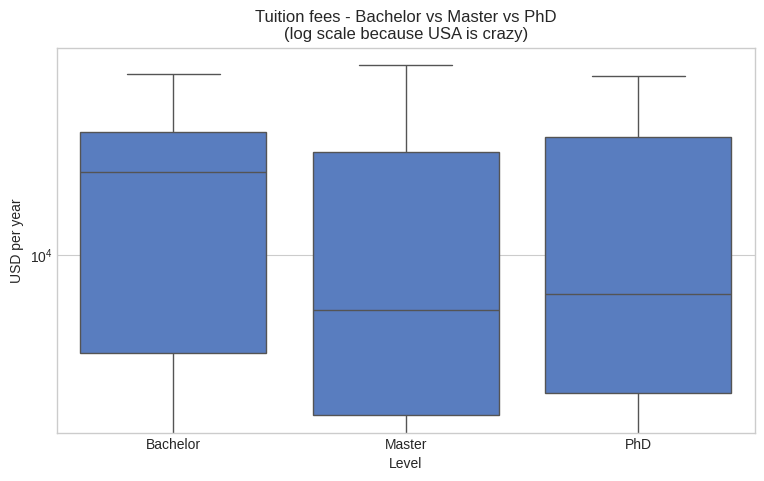

In [13]:
# Box plot
plt.figure(figsize=(9,5))
sns.boxplot(x='Level', y='Tuition_USD', data=df, order=['Bachelor','Master','PhD'])
plt.yscale('log')
plt.title("Tuition fees - Bachelor vs Master vs PhD\n(log scale because USA is crazy)")
plt.ylabel("USD per year")
plt.show()

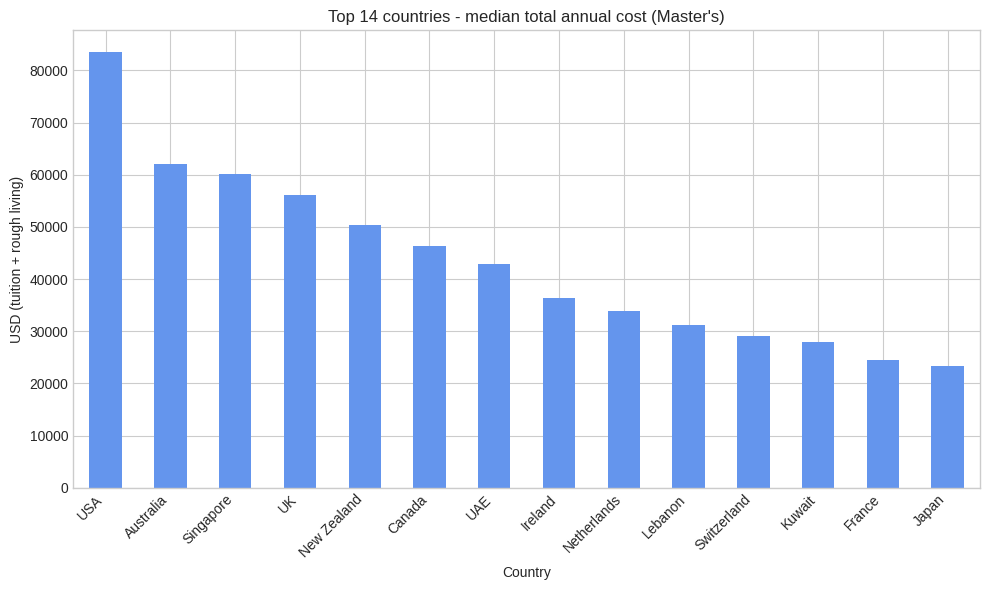

In [14]:
# Plot 2 - Top countries by median total cost (only Masters)

masters = df[df['Level'] == 'Master']

country_med = masters.groupby('Country')['Total_Annual_USD'].median().sort_values(ascending=False).head(14)

plt.figure(figsize=(10,6))
country_med.plot(kind='bar', color='cornflowerblue')
plt.title("Top 14 countries - median total annual cost (Master's)")
plt.ylabel("USD (tuition + rough living)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

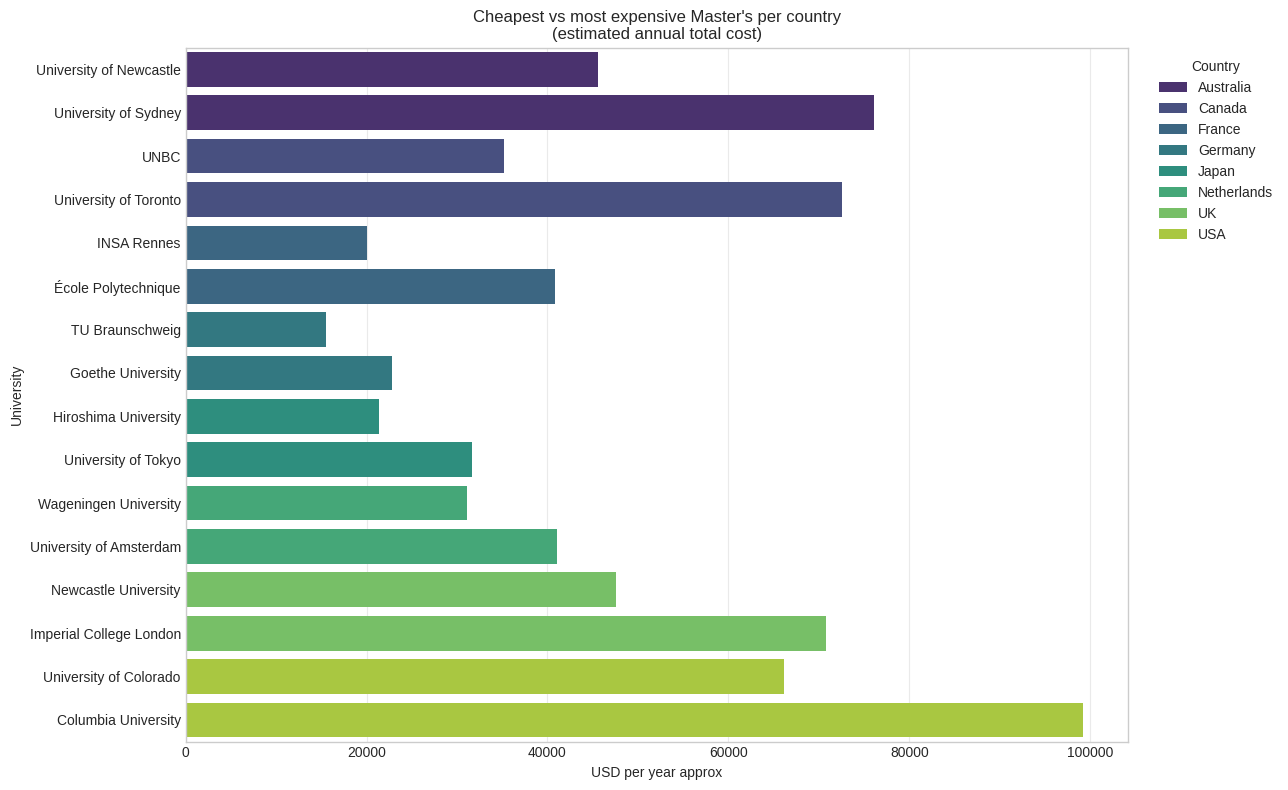

In [17]:
# Plot 4 - Cheapest vs most expensive Master's per country (selected countries)
# =============================================================================

# pick some countries that have multiple entries
interesting_countries = ['USA','UK','Canada','Australia','Germany','Netherlands','France','Japan']

selected = masters[masters['Country'].isin(interesting_countries)]

# get min and max per country
extremes = pd.concat([
    selected.loc[selected.groupby('Country')['Total_Annual_USD'].idxmin()],
    selected.loc[selected.groupby('Country')['Total_Annual_USD'].idxmax()]
])

extremes = extremes.sort_values(['Country','Total_Annual_USD'])

plt.figure(figsize=(13,8))

sns.barplot(
    data=extremes,
    y='University',
    x='Total_Annual_USD',
    hue='Country',
    palette='viridis',
    dodge=False
)

plt.title("Cheapest vs most expensive Master's per country\n(estimated annual total cost)")
plt.xlabel("USD per year approx")
plt.legend(title='Country', bbox_to_anchor=(1.02,1), loc='upper left')
plt.grid(axis='x', alpha=0.4)
plt.tight_layout()
plt.show()

In [18]:
print("\nSome really affordable Master's:")
masters.sort_values('Total_Annual_USD').head(10)[
    ['Country','City','University','Program','Tuition_USD','Rent_USD','Total_Annual_USD']
]


Some really affordable Master's:


,Country,City,University,Program,Tuition_USD,Rent_USD,Total_Annual_USD
747,Argentina,Rosario,National University of Rosario,Computer Engineering,0,260,10320
797,Algeria,Annaba,Badji Mokhtar University,Computer Engineering,1000,180,10360
755,Tunisia,Gabes,University of Gabes,Computer Engineering,1400,160,10520
740,Argentina,Cordoba,National University of Cordoba,Data Science,0,280,10560
781,Algeria,Oran,University of Oran,Computer Engineering,1100,220,10940
734,Tunisia,Sfax,University of Sfax,Artificial Intelligence,1400,200,11000
685,Egypt,Aswan,Aswan University,Data Analytics,1900,160,11020
802,Uruguay,Paysandu,Universidad de Paysandu,Software Engineering,0,330,11160
831,Bangladesh,Rajshahi,RUET,Software Engineering,2000,170,11240
670,Brazil,Recife,UFPE,Computer Engineering,0,350,11400
